# **Handwritten Arabic Characters Recognition with CNN**
---





## Data preparation

### Data load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
arabic_characters = ['alif', 'bae', 'tae', 'thae', 'jim', 'hae', 'khaa', 'dal', 'dhal',
                    'rae', 'zain', 'sin', 'chin', 'sad', 'dad', 'tae', 'zain', 'aain',
                    'ghain', 'fae', 'qaf', 'kaf', 'lam', 'mim', 'noun', 'hae', 'waw', 'yae']

In [ ]:
len(arabic_characters)

28

In [ ]:
x_train = pd.read_csv("/content/drive/My Drive/colab_files/csvTrainImages 13440x1024.csv",header=None)
x_test = pd.read_csv("/content/drive/My Drive/colab_files/csvTestImages 3360x1024.csv",header=None)
y_train = pd.read_csv("/content/drive/My Drive/colab_files/csvTrainLabel 13440x1.csv",header=None)
y_test = pd.read_csv("/content/drive/My Drive/colab_files/csvTestLabel 3360x1.csv",header=None)

In [ ]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Data cleaning

In [ ]:
x_train.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1019    0
1020    0
1021    0
1022    0
1023    0
Length: 1024, dtype: int64

In [ ]:
x_train.isnull().sum().sum()

0

In [ ]:
x_test.isnull().sum().sum()

0

In [ ]:
y_train.shape

(13440, 1)

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_train.shape

(13440, 1)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train.shape

(13440, 1024)

In [ ]:
y_train.shape

(13440, 1)

In [ ]:
x_test.shape

(3360, 1024)

In [ ]:
y_test.shape

(3360, 1)

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

1


Text(0.5, 0, 'alif')

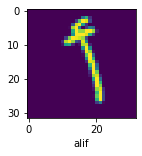

In [ ]:
plt.figure(figsize=(2,2))
print(int(y_train[0]))
plt.imshow(x_train[0].reshape(32,32).T)
plt.xlabel(arabic_characters[int(y_train[0])-1])

Text(0.5, 0, 'alif')

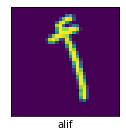

In [ ]:
plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[0].reshape(32,32).T)
plt.xlabel(arabic_characters[int(y_train[0])-1])

Text(0.5, 0, 'alif')

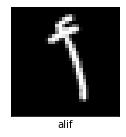

In [ ]:
plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[0].reshape(32,32).T,"gray")
plt.xlabel(arabic_characters[int(y_train[0])-1])

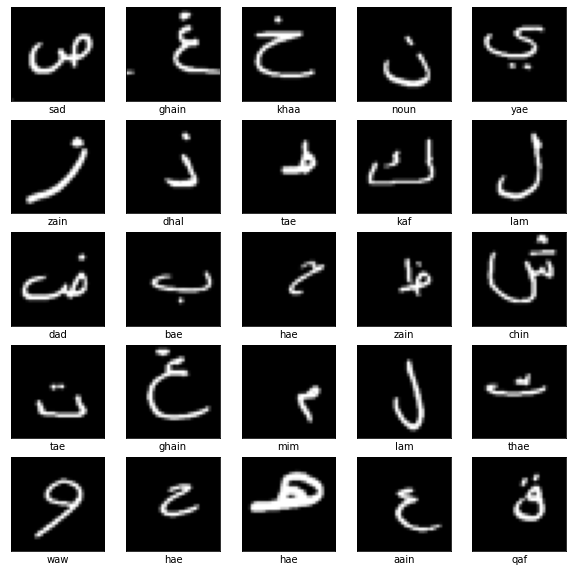

In [ ]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])-1])
plt.show()

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train.shape

(13440, 32, 32, 1)

In [ ]:
y_train.shape

(13440, 29)

In [ ]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
len(y_train[0])

29

In [ ]:
y_train = y_train[:,1:]

In [ ]:
y_test = y_test[:,1:]

In [ ]:
len(y_train[0])

28

## CNN model

In [ ]:
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from keras.layers.pooling import MaxPooling2D

In [ ]:

model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
420/420 [==============================] - 23s 55ms/step - loss: 2.0859 - accuracy: 0.3743
Epoch 2/10
420/420 [==============================] - 23s 55ms/step - loss: 1.1270 - accuracy: 0.6465
Epoch 3/10
420/420 [==============================] - 23s 54ms/step - loss: 0.8123 - accuracy: 0.7435
Epoch 4/10
420/420 [==============================] - 23s 54ms/step - loss: 0.6376 - accuracy: 0.7992
Epoch 5/10
420/420 [==============================] - 23s 55ms/step - loss: 0.5408 - accuracy: 0.8261
Epoch 6/10
420/420 [==============================] - 23s 54ms/step - loss: 0.4815 - accuracy: 0.8429
Epoch 7/10
420/420 [==============================] - 23s 55ms/step - loss: 0.4390 - accuracy: 0.8558
Epoch 8/10
420/420 [==============================] - 24s 56ms/step - loss: 0.4080 - accuracy: 0.8654
Epoch 9/10
420/420 [==============================] - 23s 56ms/step - loss: 0.3799 - accuracy: 0.8751
Epoch 10/10
420/420 [==============================] - 23s 56ms/step - loss: 0.352

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 28)               

In [ ]:
model.evaluate(x_test,y_test)

105/105 [==============================] - 2s 14ms/step - loss: 0.3069 - accuracy: 0.9152


[0.3068748414516449, 0.9151785969734192]

## Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
epochs = 100
batch_size = 32 

# construct the training image generator for data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,# set input mean to 0 over the dataset
    samplewise_center=False, # set each sample mean to 0
    featurewise_std_normalization=False, # divide inputs by std of the dataset
    samplewise_std_normalization=False, # divide each input by its std
    zca_whitening=False, # apply ZCA whitening
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1, # Randomly zoom image
    width_shift_range=0.1,# randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,# randomly shift images vertically (fraction of total height
    horizontal_flip=False, # randomly flip images
    vertical_flip=False) # randomly flip images

In [ ]:
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
history = model.fit(train_gen, epochs=epochs,verbose=0, 
                             steps_per_epoch=x_train.shape[0]//batch_size,
                             validation_data=test_gen,
                             validation_steps=x_test.shape[0]//batch_size)

## Training and validation curves

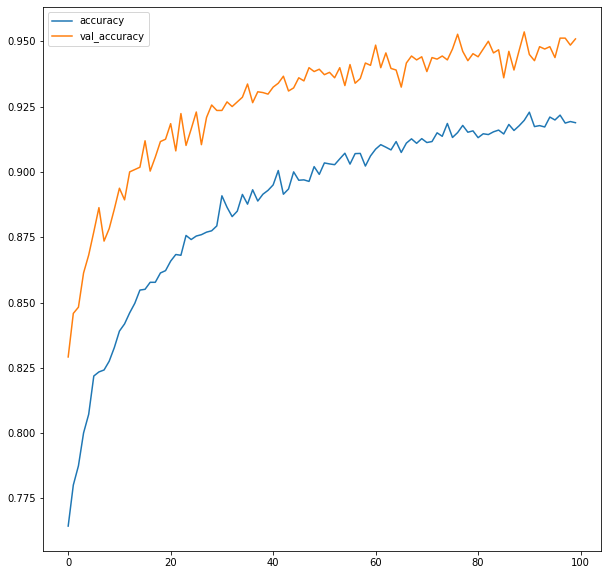

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"], label='Training accuracy')
plt.plot(history.history["val_accuracy"], label='Validation accuracy')
plt.legend(["accuracy","val_accuracy"])
plt.show()

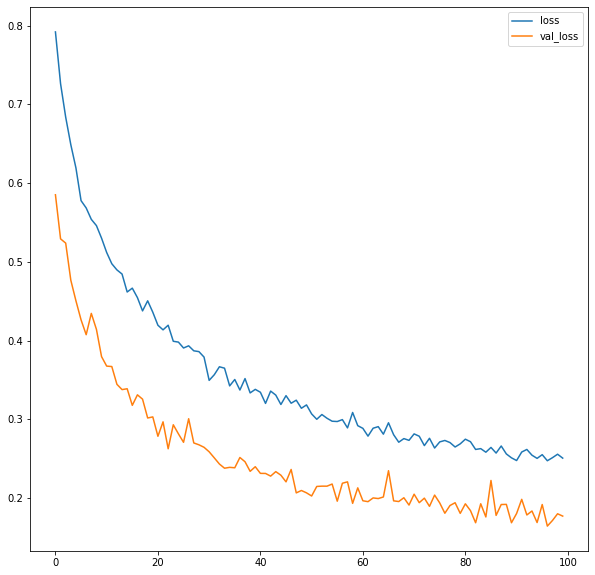

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history["loss"], label='Training loss')
plt.plot(history.history["val_loss"], label='Validation loss')
plt.legend(["loss","val_loss"])
plt.show()

## Confusion matrix

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Truth')

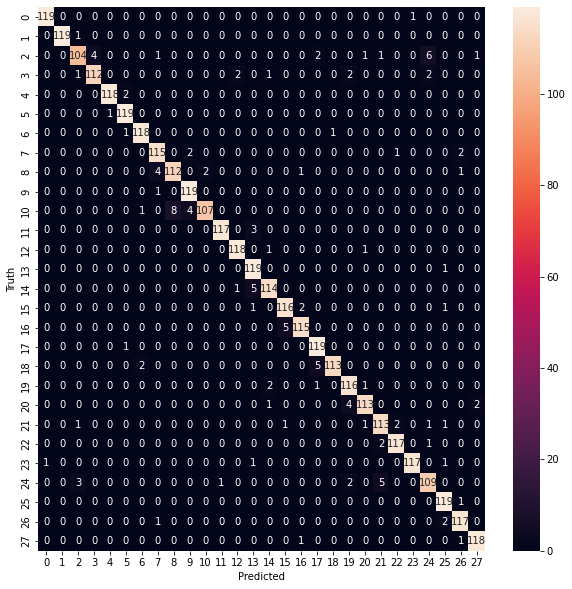

In [ ]:
# Predict the values from the validation dataset
y_preds = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_preds, axis=1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Handwritten characters recognition with CV2

In [ ]:
import argparse
import imutils
from imutils.contours import sort_contours
import cv2 as cv

In [ ]:
from keras.models import load_model

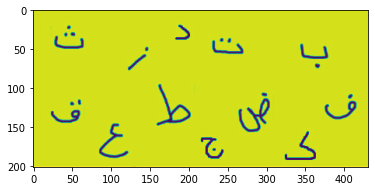

In [ ]:
img = cv.imread("/content/drive/My Drive/colab_files/imgcv.jpg")
kernel = np.ones((5,5),dtype=np.uint8)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(gray)

In [ ]:
(T, thresh) = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

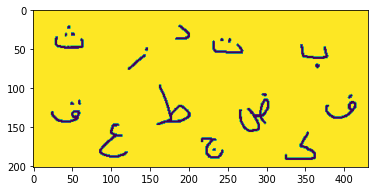

In [ ]:
plt.imshow(thresh)

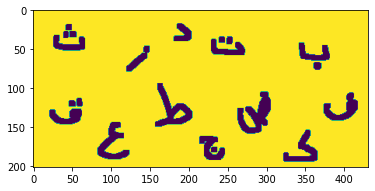

In [ ]:
erodation = cv.erode(thresh,kernel,iterations = 1)
plt.imshow(erodation)

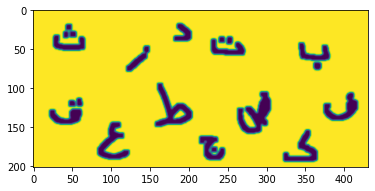

In [ ]:
blurred = cv.GaussianBlur(erodation, (5,5), 0)
plt.imshow(blurred)

In [ ]:
edged = cv.Canny(blurred, 30, 150)
# Since OpenCV 3.2, findContours() no longer modifies the source image.
cnts = cv.findContours(edged.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

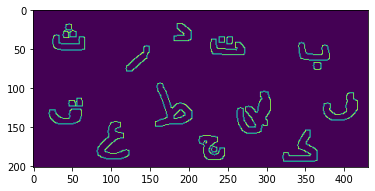

In [ ]:
plt.imshow(edged)

In [ ]:
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv.boundingRect(c)

    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        thresh = cv.threshold(roi, 0, 255,
            cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
        (tH, tW) = thresh.shape

        # if the width is greater than the height, resize along the
        # width dimension
        if tW > tH:
            thresh = imutils.resize(thresh, width=32)

        # otherwise, resize along the height
        else:
            thresh = imutils.resize(thresh, height=32)

        # re-grab the image dimensions (now that its been resized)
        # and then determine how much we need to pad the width and
        # height such that our image will be 32x32
        (tH, tW) = thresh.shape
        dX = int(max(0, 32 - tW) / 2.0)
        dY = int(max(0, 32 - tH) / 2.0)

        # pad the image and force 32x32 dimensions
        padded = cv.copyMakeBorder(thresh, top=dY, bottom=dY,
            left=dX, right=dX, borderType=cv.BORDER_CONSTANT,
            value=(0, 0, 0))
        padded = cv.resize(padded, (32, 32))

        # prepare the padded image for classification via our
        # handwriting OCR model
        padded = padded.astype("float32") / 255.0
        padded = np.expand_dims(padded, axis=-1)

        # update our list of characters that will be OCR'd
        chars.append((padded, (x, y, w, h)))

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
preds = model.predict(chars)
# define the list of label names
labelNames = arabic_characters

tae - 82.23%
alif - 97.22%
hae - 98.30%
mim - 69.36%
sad - 95.54%
tae - 82.06%
sad - 70.15%
hae - 99.68%
alif - 99.97%
dad - 92.03%
kaf - 60.65%
zain - 92.35%
zain - 99.62%


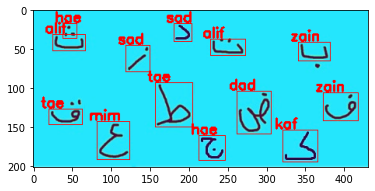

In [ ]:
# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
    # find the index of the label with the largest corresponding
    # probability, then extract the probability and label
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
   
    # draw the prediction on the image
    print("{} - {:.2f}%".format(label, prob * 100))
    cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
    cv.putText(img, label, (x - 10, y - 2), cv.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
   
    # show the image
    #cv.imshow("Image", image)
    #cv.waitKey(0)
    plt.imshow(img)

In [ ]:
model.save("/content/drive/My Drive/colab_files/modelcharacters1.h5")